# Customer Segmentation Analysis
This notebook performs segmentation using demographic, behavioral, RFM, and K-Means clustering techniques with enhanced visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Load cleaned dataset
df = pd.read_csv("marketing_campaign_cleaned.csv")

# Show sample
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,TotalSpent,Customer_For_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,68,0,1617,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,71,2,27,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,60,0,776,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,41,1,53,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,44,1,422,161


## 1. Demographic Segmentation

C:\Users\CITS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\CITS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


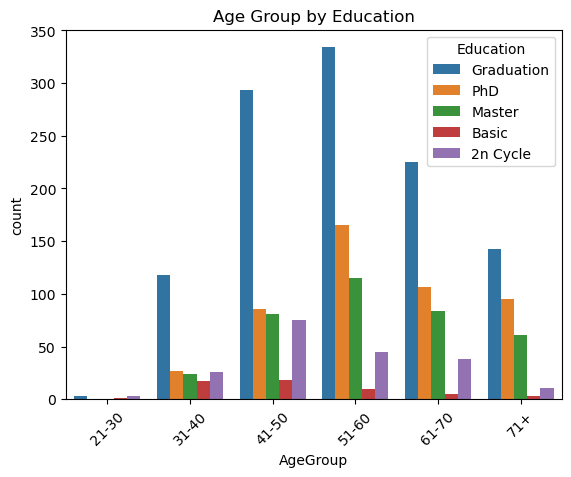

In [3]:
# Grouping by age and income bands
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 100], labels=['21-30', '31-40', '41-50', '51-60', '61-70', '71+'])
df['IncomeGroup'] = pd.cut(df['Income'], bins=5)

# Visualize distribution
sns.countplot(data=df, x='AgeGroup', hue='Education')
plt.title("Age Group by Education")
plt.xticks(rotation=45)
plt.show()

## 2. Behavioral Segmentation

C:\Users\CITS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


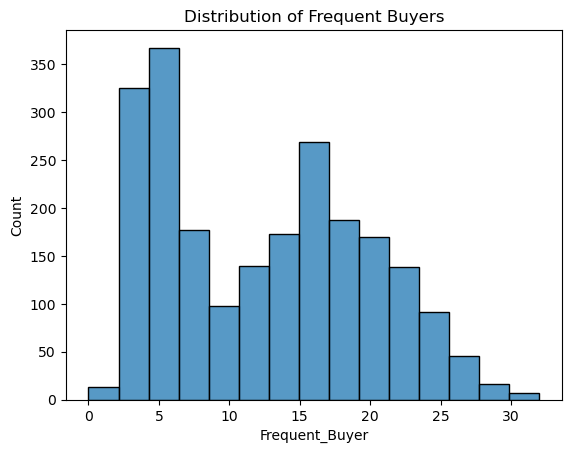

In [5]:
# Define frequent buyers
df['Frequent_Buyer'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
sns.histplot(df['Frequent_Buyer'], bins=15)
plt.title("Distribution of Frequent Buyers")
plt.show()

## 3. RFM Analysis

In [7]:
# Use 'Recency', 'TotalSpent', 'Frequent_Buyer'
rfm = df[['ID', 'Recency', 'Frequent_Buyer', 'TotalSpent']].copy()
rfm.columns = ['ID', 'Recency', 'Frequency', 'Monetary']

# Assign RFM scores
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,ID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,5524,58,22,1617,3,5,5,13
1,2174,38,4,27,4,1,1,6
2,4141,26,20,776,4,4,4,12
3,6182,26,6,53,4,2,1,7
4,5324,94,14,422,1,3,3,7


## 4. K-Means Clustering

C:\Users\CITS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


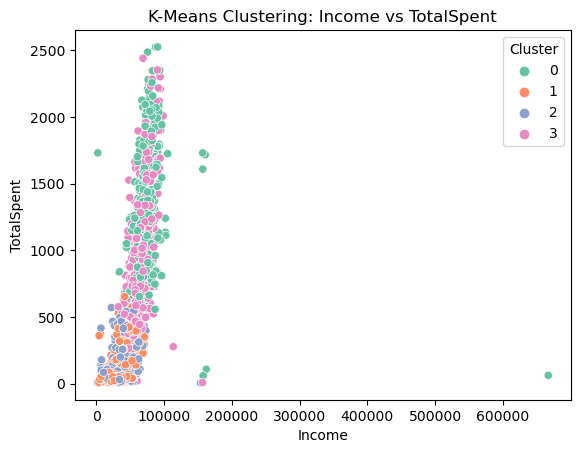

In [9]:
features = df[['Age', 'Income', 'Recency', 'TotalSpent', 'Frequent_Buyer']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
sns.scatterplot(x=df['Income'], y=df['TotalSpent'], hue=df['Cluster'], palette='Set2')
plt.title("K-Means Clustering: Income vs TotalSpent")
plt.show()

## 📊 Enhanced Visualizations & Insights

C:\Users\CITS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


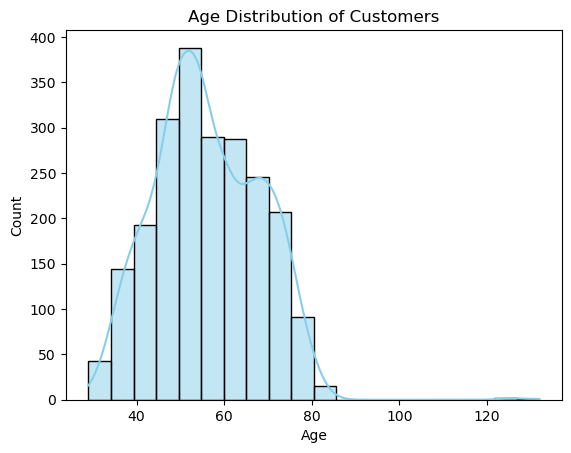

In [11]:
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\CITS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


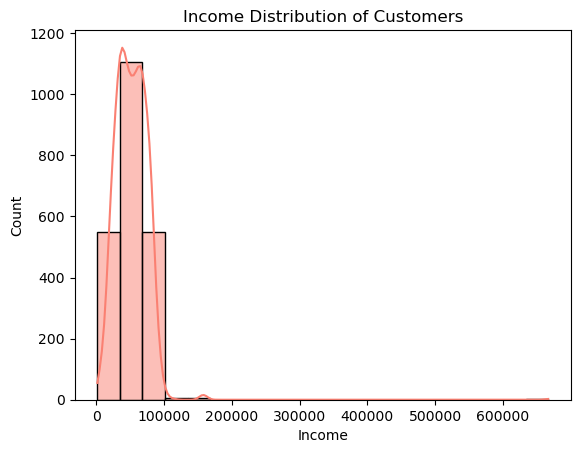

In [13]:
sns.histplot(df['Income'], bins=20, kde=True, color='salmon')
plt.title("Income Distribution of Customers")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

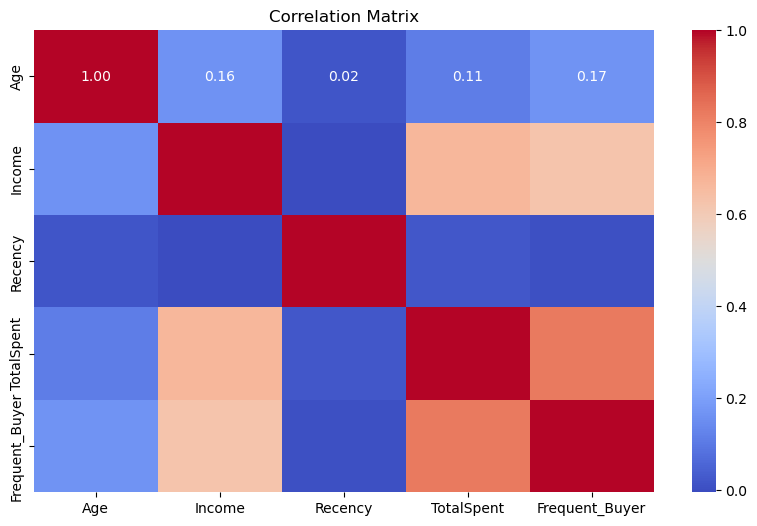

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Age', 'Income', 'Recency', 'TotalSpent', 'Frequent_Buyer']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

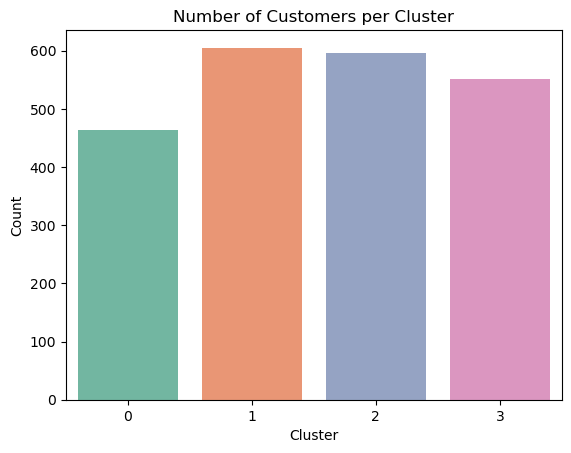

In [17]:
sns.countplot(data=df, x='Cluster', palette='Set2')
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

C:\Users\CITS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CITS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CITS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CITS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

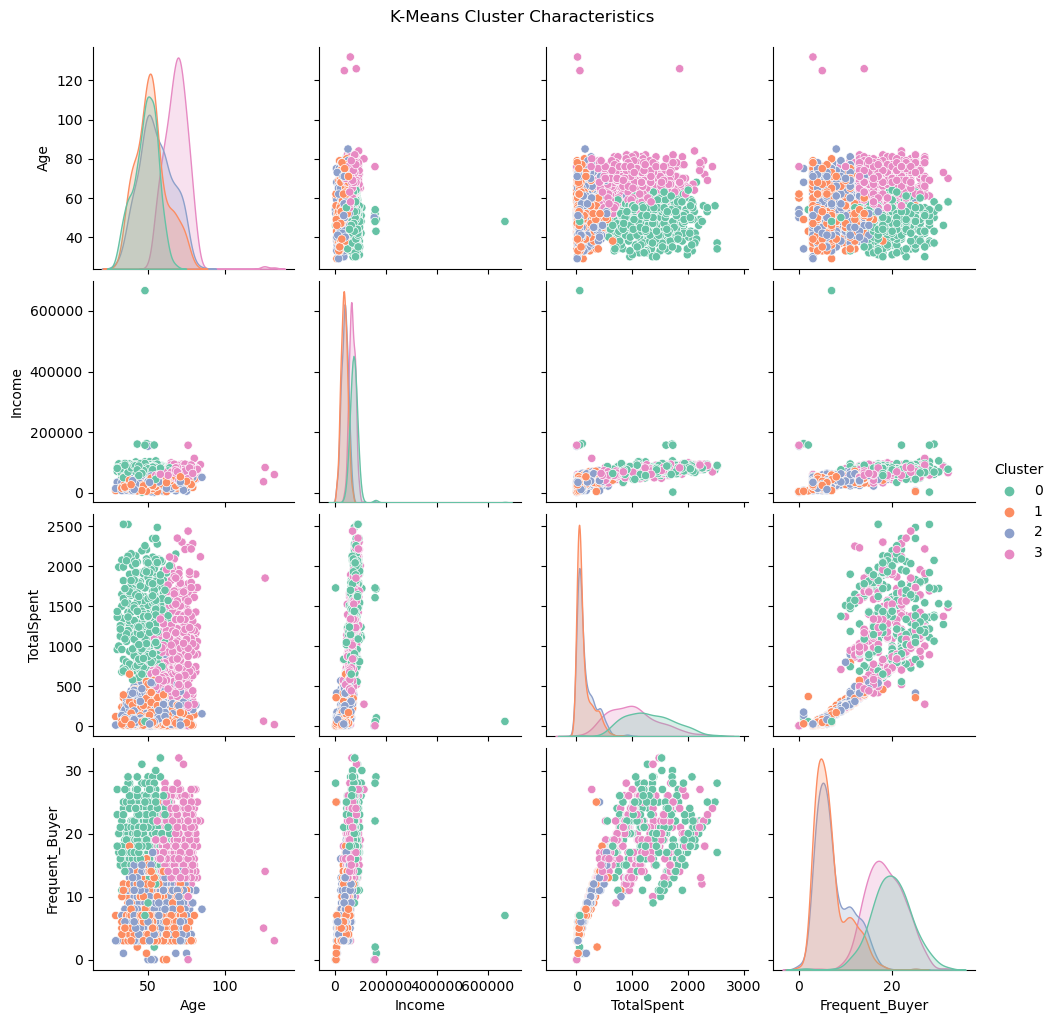

In [19]:
sns.pairplot(df[['Age', 'Income', 'TotalSpent', 'Frequent_Buyer', 'Cluster']], hue='Cluster', palette='Set2')
plt.suptitle("K-Means Cluster Characteristics", y=1.02)
plt.show()

In [21]:
# Save with cluster labels
df.to_csv("segmented_customers.csv", index=False)